# Optimizing-Agricultural-Production
## Problem Statement -
Building a Predictive Model so as to suggest the most suitable crops to grow based on the available climatic and soil conditions.

## Goal -
To achieve precision farming by optimizing the agricultural production.
The project is intended on Precision Farming.

➔ To Optimize Productivity

➔ By Understanding requirements of climatic and soil conditions for crops.

➔ Helps us to Cope up with weather unpredictability.

## About The Dataset Used (data.csv) -
The Dataset Consists of 22 Unique Crops such as Maize, Wheat, Mango, Watermelon, Mango etc.

➔ The dataset consists of climatic conditions required to grow the crops.

   ◆ Temperature, Humidity, Rainfall.

➔ The dataset also consists of soil conditions required to grow the crops

   ◆ N: The Ratio of Nitrogen Content in Soil.
   
   ◆ P: The Ratio of Phosphorus Content in Soil.
   
   ◆ K: The Ratio of Potassium Content in Soil.
   
   ◆ pH: pH of the Soil
   
   
   ## Libraries Used In The Project -
   
● Numpy: Used for Mathematical Operations.

● Pandas: Used for DataFrame Operations.

● Seaborn and Matplotlib: Used for Data Visualizations.

● Ipywidgets: Used for Interactive Analysis.

● Sklearn: Used for Machine Learning Algorithms

   ## Steps of the algorithms
1- Understanding the Dataset.

2- Understanding the Problem Statement.

3- Performing Descriptive Statistics.

4- Clustering Similar Crops.

5- Visualizing the Hidden Patterns.

6- Building a Machine Learning Classification Model.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [2]:
#Reading the Dataset.
df=pd.read_csv("data.csv")
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [35]:
#Checking the missing values
count=df.isnull().sum().sort_values(ascending=False)
percent=((df.isnull().sum())/df.isnull().count()).sort_values(ascending=False)

missing_data=pd.concat([count,percent],axis=1,keys=['total','percent'])
missing_data.head(10)

,total,percent
N,0,0.0
P,0,0.0
K,0,0.0
temperature,0,0.0
humidity,0,0.0
ph,0,0.0
rainfall,0,0.0
label,0,0.0


In [4]:
#Checking the crops present
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [5]:
#Checking average climatic and soil requirements
cond=df[['N','P','K','temperature','humidity','ph','rainfall']]
cond.mean()


N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

In [6]:
df.duplicated().sum()

0

In [7]:
#Checking the detailed statistics for each crop
df.describe()
y=['N','P','K','temperature','humidity','ph','rainfall']
df[df['label']=="rice"][y].mean()

N               79.890000
P               47.580000
K               39.870000
temperature     23.689332
humidity        82.272822
ph               6.425471
rainfall       236.181114
dtype: float64

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
#Comparing Average requirement and conditions for each crop
from ipywidgets import interact
import ipywidgets as widgets
@interact
def newdata (conditions=['N','P','K','temperature','humidity','ph','rainfall']) :
    
    for i in df['label'].unique():
        print( df[df['label']==i][conditions].mean())
    



interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [10]:
#Checking the below and above Average Conditions
from ipywidgets import interact
import ipywidgets as widgets
@interact
def newdata (conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print("Crops greater than average conditions",df[df[conditions] >= df[conditions].mean()]['label'].unique())
    print("Crops smaller than average conditions",df[df[conditions] <= df[conditions].mean()]['label'].unique())    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

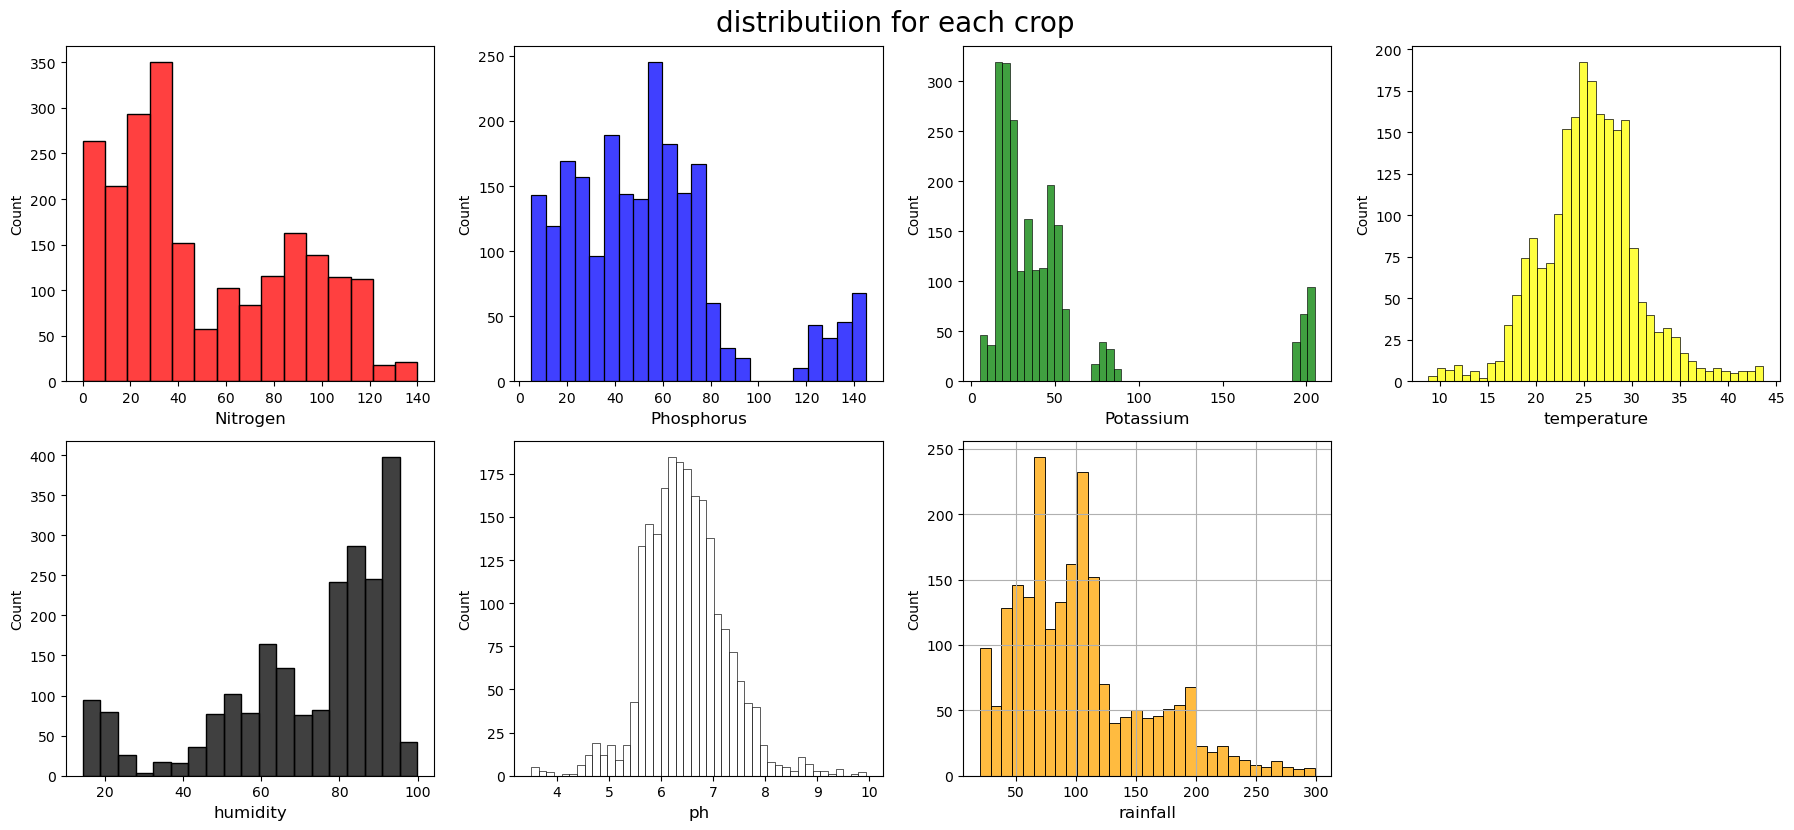

In [11]:
#Checking distributiion for each crop
fig = plt.figure(figsize=(18, 12))

plt.subplot(3,4,1)
sns.histplot(df['N'],color='red')
plt.xlabel("Nitrogen",fontsize = 12)

plt.subplot(3,4,2)
sns.histplot(df['P'],color='blue')
plt.xlabel("Phosphorus",fontsize = 12)

plt.subplot(3,4,3)
sns.histplot(df['K'],color='green')
plt.xlabel("Potassium",fontsize = 12)

plt.subplot(3,4,4)
sns.histplot(df['temperature'], color="yellow")
plt.xlabel('temperature',fontsize = 12)

plt.subplot(3,4,5)
sns.histplot(df['humidity'], color="black")
plt.xlabel('humidity', fontsize = 12)

plt.subplot(3,4,6)
sns.histplot(df['ph'], color="white")
plt.xlabel('ph', fontsize = 12)

plt.subplot(3,4,7)
sns.histplot(df['rainfall'], color="orange")
plt.xlabel('rainfall', fontsize = 12)

plt.suptitle('distributiion for each crop',fontsize = 20)
plt.tight_layout()

plt.grid()


In [12]:
#Checking that crops those have unusual requirements
print('extrem Nitrogen ',df[df["N"]>120]['label'].unique())
print("*"*50)
print('extrem humidity ',df[df["humidity"]<20]['label'].unique())
print("*"*50)
print('extrem Phosphorus ',df[df["P"]>100]['label'].unique())
print("*"*50)
print('extrem Potassium',df[df["K"]>200]['label'].unique())
print("*"*50)
print('extrem rainfall ',df[df["rainfall"]>200]['label'].unique())
print("*"*50)
print('low temperature ',df[df["temperature"]<10]['label'].unique())
print("*"*50)
print('extrem temperature ',df[df["temperature"]>40]['label'].unique())
print("*"*50)
print('extrem ph',df[df["ph"]<4]['label'].unique())
print("*"*50)
print('low ph ',df[df["ph"]>9]['label'].unique())




extrem Nitrogen  ['cotton']
**************************************************
extrem humidity  ['chickpea' 'kidneybeans']
**************************************************
extrem Phosphorus  ['grapes' 'apple']
**************************************************
extrem Potassium ['grapes' 'apple']
**************************************************
extrem rainfall  ['rice' 'papaya' 'coconut']
**************************************************
low temperature  ['grapes']
**************************************************
extrem temperature  ['grapes' 'papaya']
**************************************************
extrem ph ['mothbeans']
**************************************************
low ph  ['mothbeans']


In [13]:
#Checking which crop to be grown according to the season
print("Summer Crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())


print("*"*50)

print("Winter Crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())

print("*"*50)

print("Monsoon")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())



Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
**************************************************
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
**************************************************
Monsoon
['rice' 'papaya' 'coconut']


In [14]:
new_data=df.drop("label",axis=1)
target= df["label"]

E:\Anaconda\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

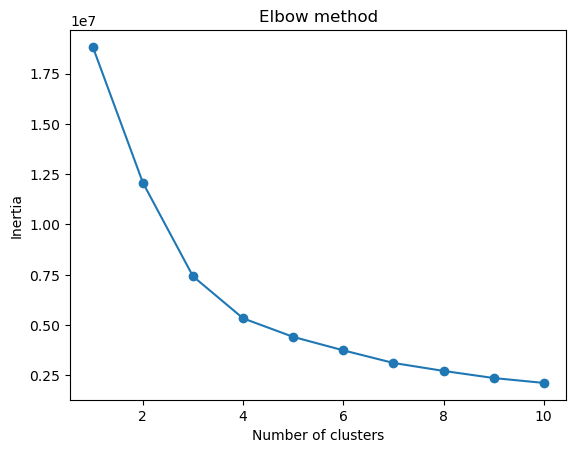

In [15]:
#Determining the optimum number of clusters within the Dataset
from sklearn.cluster import KMeans
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(new_data)
    inertias.append(kmeans.inertia_) 

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
#Implementation of K Means algorithm to perform Clustering analysis
kmeans = KMeans(n_clusters=4,max_iter=200,random_state=0,init="k-means++",n_init=10)
kmean=kmeans.fit_predict(new_data)
a=pd.DataFrame(kmean)
z=pd.concat([a,target],axis=1)



In [17]:
z=z.rename(columns={0:'cluster'})
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("Crops in second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("...........................................")

print("Crops in third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("...........................................")

print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())



Crops in First Cluster: ['grapes' 'apple']
Crops in second Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
...........................................
Crops in third Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
...........................................
Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [18]:
#Splitting the Dataset for predictive modelling
featurs=df.drop("label",axis=1)
target= df["label"]

In [19]:
#Creating training and testing sets for results validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featurs, target, test_size=0.2, random_state=0, shuffle =True)

In [20]:
#Creating a Predictive Model
from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression().fit(X_train,y_train)

print(LogisticRegression.score(X_train,y_train))
print(LogisticRegression.score(X_test,y_test))

y_predect_LR=LogisticRegression.predict(X_test)


0.9693181818181819
0.9681818181818181


E:\Anaconda\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


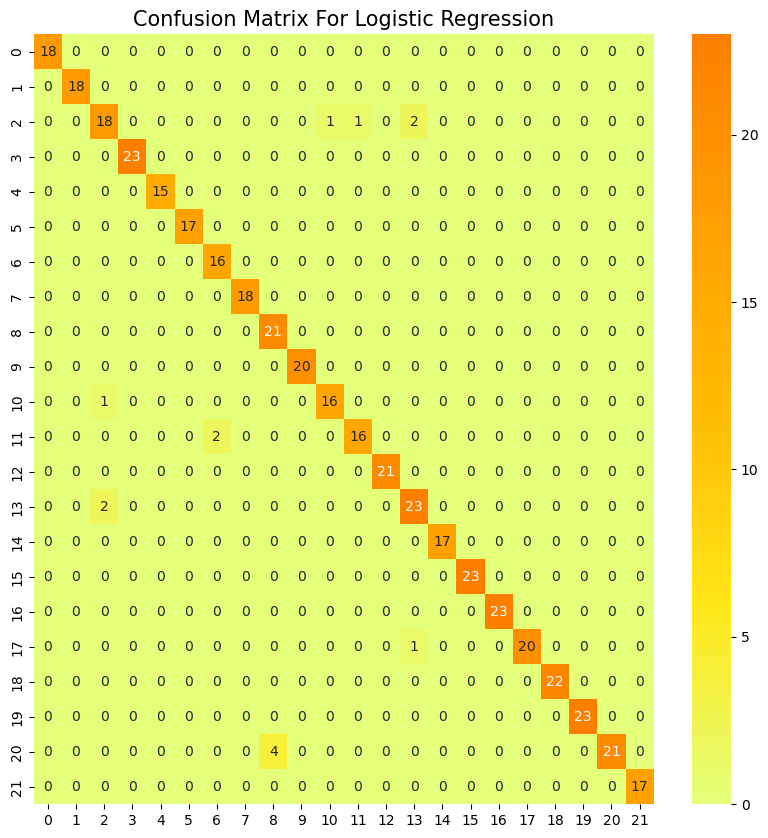

In [21]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_predect_LR)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For Logistic Regression', fontsize = 15)
plt.show()

In [22]:
#Defining the classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_predect_LR)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [23]:
prd= LogisticRegression.predict(np.array([[90,42,43,20.879744,82.002744,6.502985,202.935536]]))
print("The Suggested Crop for given climatic condition is :",prd)

The Suggested Crop for given climatic condition is : ['rice']


E:\Anaconda\Anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))


0.9767045454545454
0.9772727272727273


In [25]:
y_pred_SVC=LogisticRegression.predict(X_test)


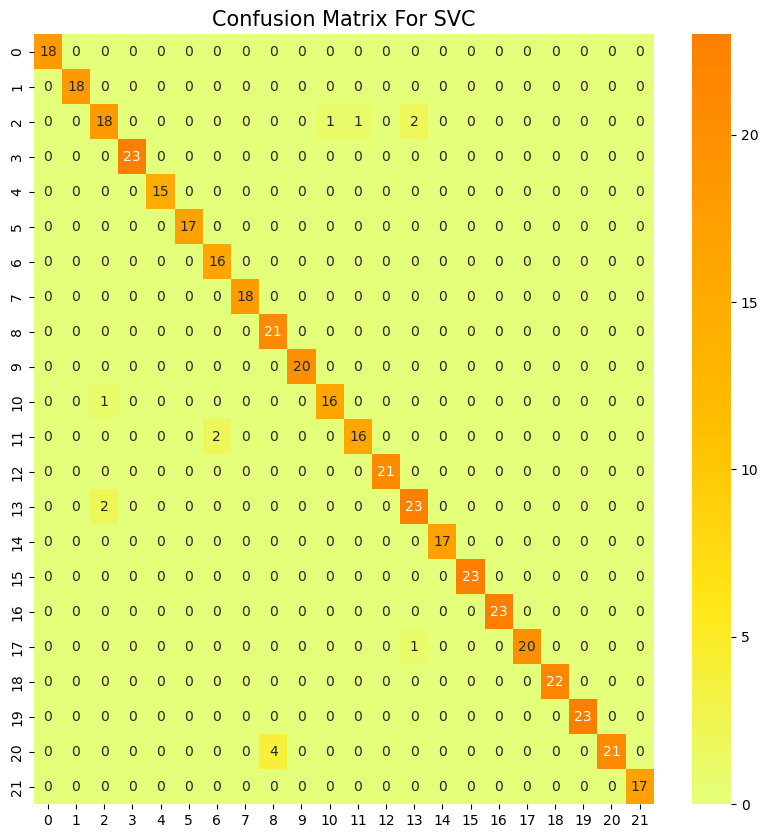

In [26]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred_SVC)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For SVC', fontsize = 15)
plt.show()

In [27]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_SVC)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [28]:
prd= svc.predict(np.array([[78,42,42,20.130175,81.604873,7.628473,262.717340]]))
print("The Suggested Crop for given climatic condition is :",prd)

The Suggested Crop for given climatic condition is : ['rice']


E:\Anaconda\Anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [29]:
#Creating a Predictive Model
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier().fit(X_train,y_train)

print("accuracy= ",dt_model.score(X_train,y_train))

y_predDT=dt_model.predict(X_test)


accuracy=  1.0


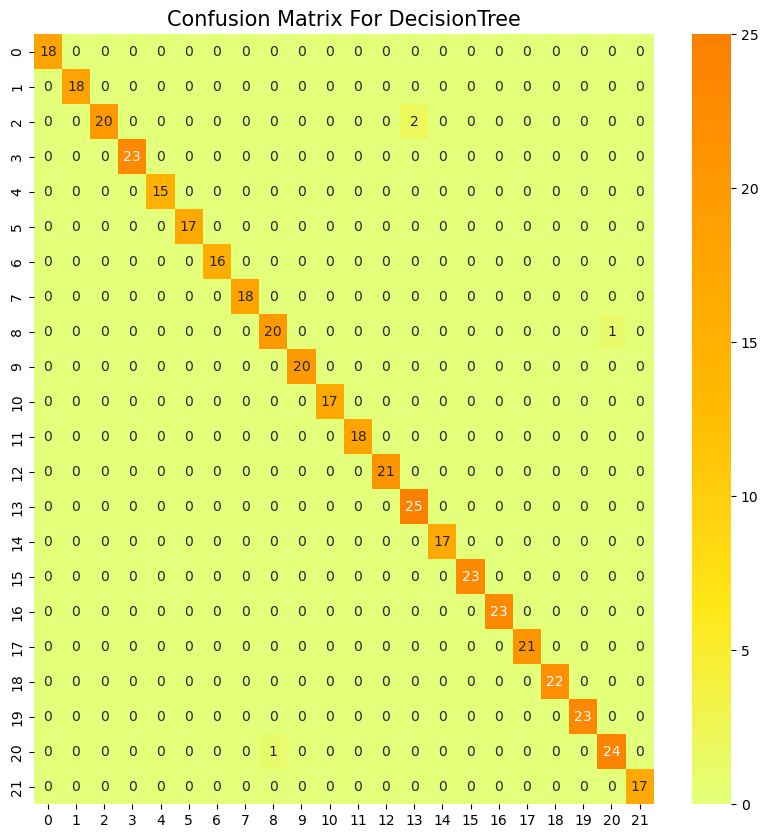

In [30]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_predDT)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For DecisionTree', fontsize = 15)
plt.show()

In [31]:
#Defining the classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_predDT)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.91      0.95        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      0.95      0.95        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.93      1.00      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [32]:
#Creating a Predictive Model

from sklearn.ensemble import RandomForestClassifier

rf_model =RandomForestClassifier().fit(X_train,y_train)

print("accuracy= ",rf_model.score(X_train,y_train))

y_predRF=dt_model.predict(X_test)

accuracy=  1.0


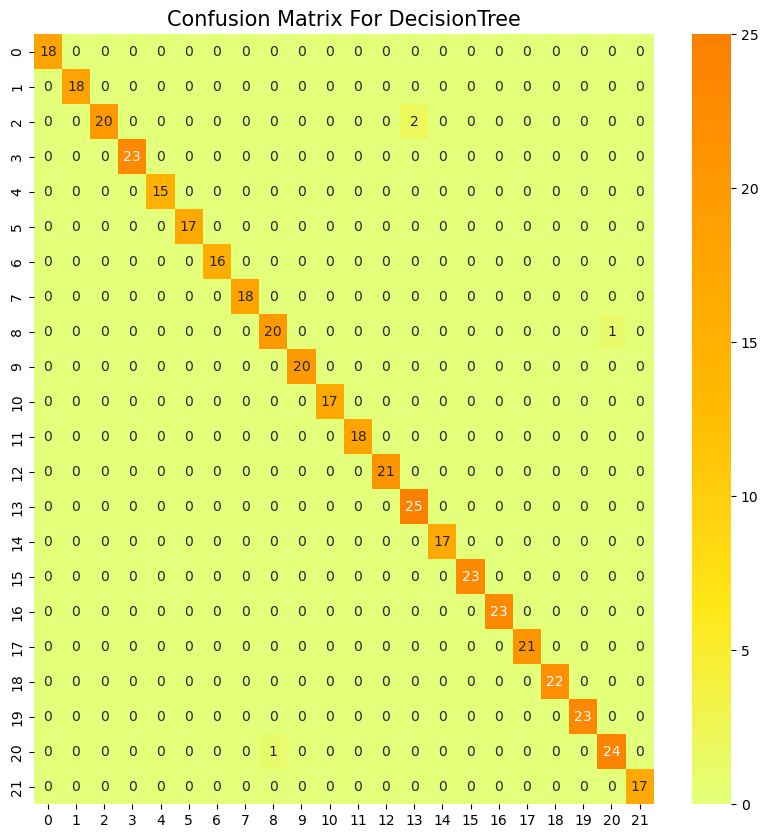

In [33]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_predRF)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For DecisionTree', fontsize = 15)
plt.show()

In [34]:
#Defining the classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_predRF)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.91      0.95        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      0.95      0.95        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.93      1.00      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    